# Stock Price Prediction 

# Project Overview

The dataset used in this project is a CSV file containing Tesla's historical stock prices. The data includes:

- Date: The date of the stock price.
- Open": The opening price of the stock.
- High: The highest price of the stock during the day.
- Low: The lowest price of the stock during the day.
- Close: The closing price of the stock.
- Adj Close: The adjusted closing price, accounting for dividends and stock splits.
- Volume: The number of shares traded on that day.
  
The goal of this project is to predict Tesla's future stock prices based on this historical data. The dataset is used to train and evaluate a machine learning model that forecasts stock prices.

## Import relevant libraries 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


import  chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

## For offline Plotting 
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)



## Load the dataset 

In [2]:
raw_data =pd.read_csv("D:\\Data_Science_Project\\Project_3\\tesla.csv")
raw_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [3]:
df = raw_data.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [5]:
df['Date'] = pd.to_datetime(df["Date"])
df['Date'].dtype

C:\Users\Chandan Kundan\AppData\Local\Temp\ipykernel_18832\2762350934.py:1: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



dtype('<M8[ns]')

In [6]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2193,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,2014-11-04 14:37:15.841313024,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
min,2010-06-29 00:00:00,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,2012-08-29 00:00:00,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,2014-11-04 00:00:00,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,2017-01-09 00:00:00,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,2019-03-15 00:00:00,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07
std,NaN,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06


## Visualize 

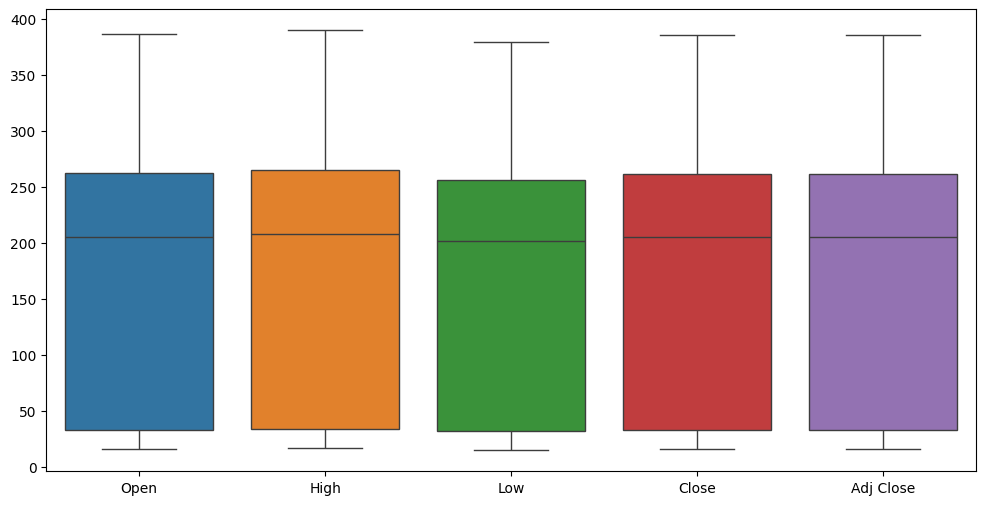

In [8]:
import seaborn as sns
fig = plt.subplots(figsize = (12,6))
sns.boxplot(df[['Open', 'High', 'Low', 'Close', 'Adj Close']])
plt.show()

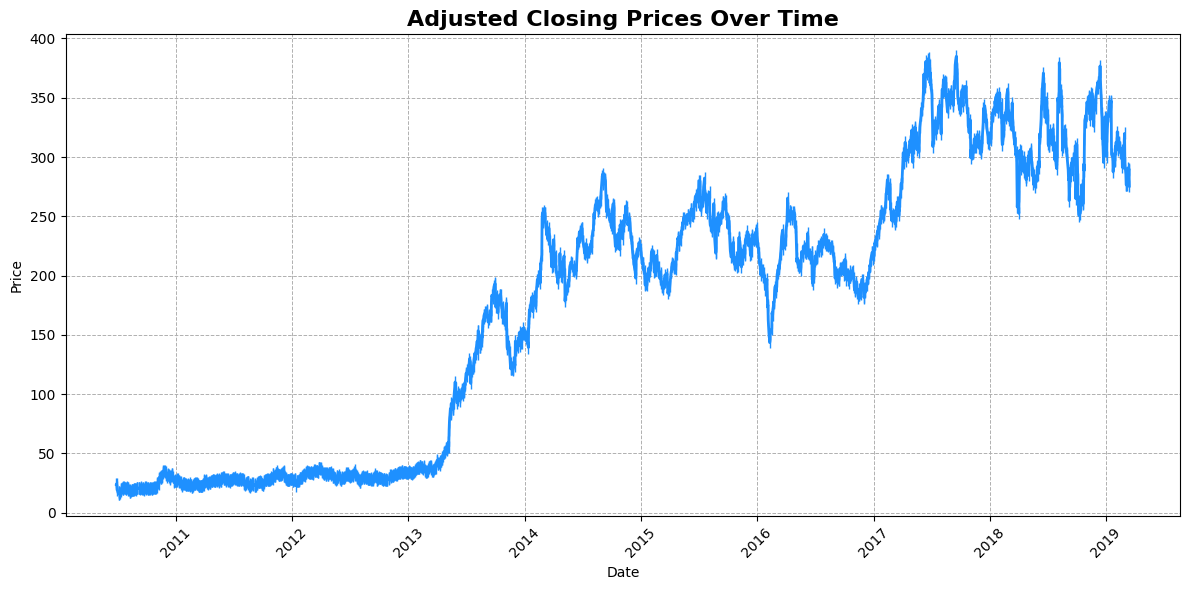

In [9]:
fig,ax = plt.subplots(figsize= (12,6))
plt.plot(df["Date"], df['Adj Close'],marker = "|" ,linestyle ="-", color = 'dodgerblue',linewidth= 2, markersize = 8)
ax.set_title('Adjusted Closing Prices Over Time', fontsize=16, fontweight='bold')
ax.set_xlabel("Date")
ax.set_ylabel("Price")
plt.xticks(rotation=45)

ax.grid(True,linestyle ="--",linewidth =0.7)
plt.tight_layout()


In [10]:
# Setting the Layout for our plot 
layout  = go.Layout(
    title = "stock prices of tesla",
    xaxis=  dict(
        title="Date", 
        titlefont = dict(
            family = 'Courier New,monospace',
            size = 18,
            color = '#7f7f7f')),
    yaxis = dict(
        title="Price",
        titlefont =dict(
            family = 'courier New,monospace',
            size = 18,
            color = '#7f7f7f'))
)

tesla_data = [{'x':df['Date'],'y':df['Close']}]
plot =go.Figure(data=tesla_data,layout =layout)

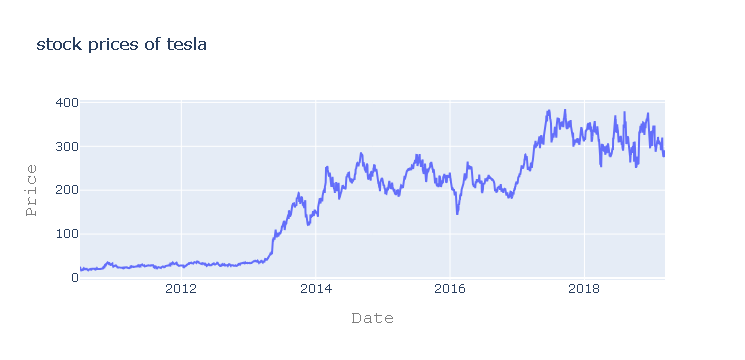

In [11]:
iplot(plot)


## Normalization 

In [12]:
from sklearn.preprocessing import MinMaxScaler

cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
scaled = MinMaxScaler()
df[cols] = pd.DataFrame(scaled.fit_transform(df[cols]), columns=cols)

## Sandardization 

In [13]:
from sklearn.preprocessing import StandardScaler
cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
scaled = StandardScaler()
df[cols] = pd.DataFrame(scaled.fit_transform(df[cols]), columns=cols)

## Spliting Test and Training Data 

In [14]:
X = df[['Open', 'High', 'Low', 'Volume']]  # Input features
Y = df['Close']  # Target variable


In [15]:
X[:4]

,Open,High,Low,Volume
0,-1.355662,-1.309919,-1.362964,3.012271
1,-1.296902,-1.263730,-1.312273,2.664764
2,-1.303738,-1.302079,-1.338938,0.691263
3,-1.321046,-1.326111,-1.352667,0.013721


In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state =42)

In [17]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((1754, 4), (439, 4), (1754,), (439,))

## Model 

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

## Model Evaluation

In [19]:
pred = model.predict(X_test)

In [20]:
mse = mean_squared_error(pred,Y_test)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.00031321673846696797
